In [3]:
# !pip3 install xgboost

  Using cached https://files.pythonhosted.org/packages/5e/49/b95c037b717b4ceadc76b6e164603471225c27052d1611d5a2e832757945/xgboost-0.90-py2.py3-none-win_amd64.whl


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import os

# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import xgboost as xgb

In [3]:
data_file_path = os.path.join("E://Data Science/Kaggle/titanic/data")

In [4]:
def load_titanic_data(filename, data_path = data_file_path):
    csv_path = os.path.join(data_path, filename)
    return pd.read_csv(csv_path)

In [5]:
titanic_train = load_titanic_data('train.csv')
titanic_test = load_titanic_data('test.csv')

combine = [titanic_train, titanic_test]

# gender_submission = pd.read_csv('C:/Users/NSingh/Nikhil/Personal/Kaggle/titanic/data/gender_submission.csv')

In [6]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# gender_submission.head()

In [9]:
titanic_train.shape, titanic_test.shape

((891, 12), (418, 11))

In [10]:
titanic_train.info()
print('_'*40)
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [11]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
titanic_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ivanoff, Mr. Kanio",male,347082,B96 B98,S
freq,1,577,7,4,644


In [13]:
titanic_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
titanic_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
titanic_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
titanic_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


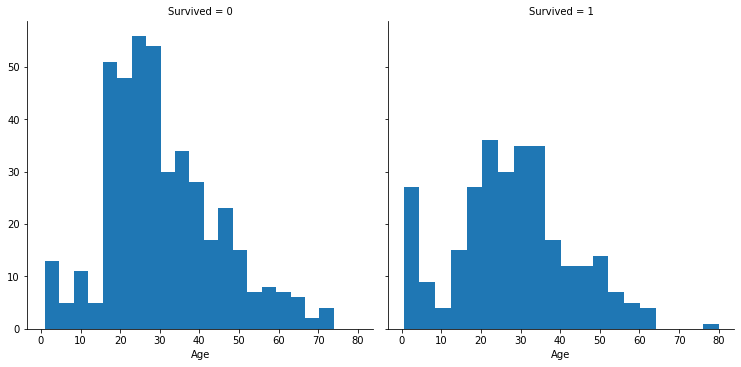

In [17]:
g = sns.FacetGrid(titanic_train, col='Survived', size=5.2)
g.map(plt.hist, 'Age', bins=20)
plt.show()

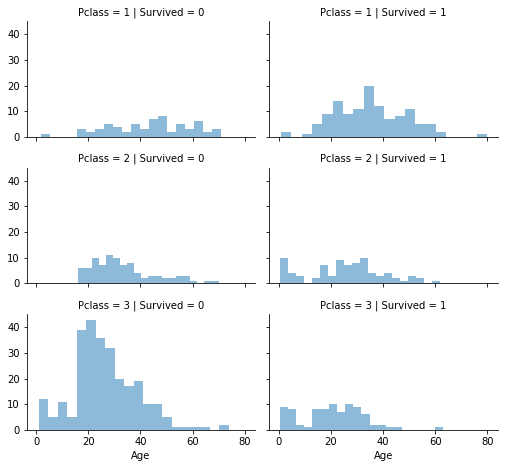

In [18]:
grid = sns.FacetGrid(titanic_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


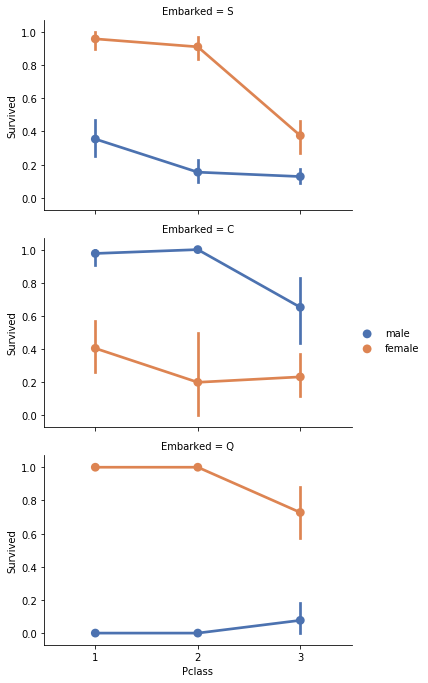

In [19]:
grid=sns.FacetGrid(titanic_train, row='Embarked', size=3.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


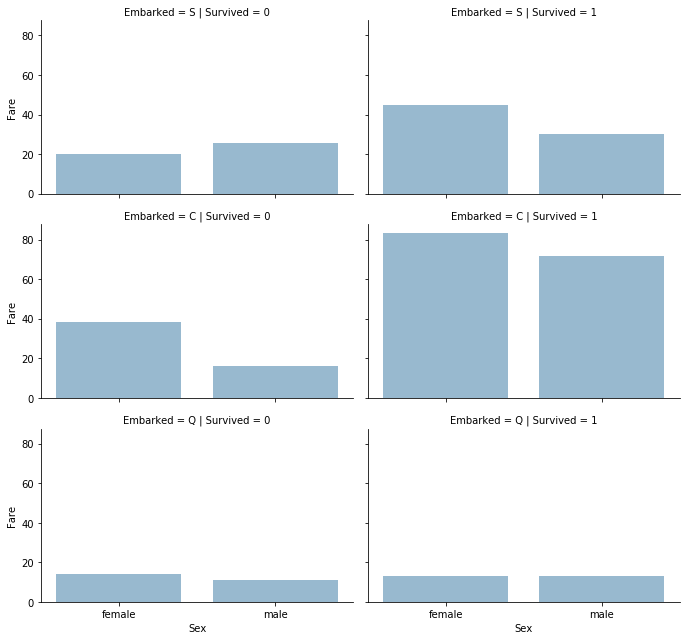

In [20]:
grid=sns.FacetGrid(titanic_train, row='Embarked', col='Survived', size=3.0, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=0.5, ci=None)
grid.add_legend()
plt.show()

In [21]:
print('Before', titanic_train.shape, titanic_test.shape, combine[0].shape, combine[1].shape)
titanic_train.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
titanic_test.drop(['Ticket', 'Cabin'], axis=1, inplace=True)
combine=[titanic_train, titanic_test]
print('After', titanic_train.shape, titanic_test.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [22]:
# Extracting Titles from name
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    
pd.crosstab(titanic_train['Title'], titanic_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [23]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Rev', 'Sir'], 'Rare')
    
    dataset['Title']=dataset['Title'].replace('Mlle', "Miss")
    dataset['Title']=dataset['Title'].replace('Ms', "Miss")
    dataset['Title']=dataset['Title'].replace('Mme', "Mrs")
    
titanic_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [24]:
# Converting Categorical Title to Ordinal

title_mapping = {"Mr":1
                , "Miss":2
                , "Mrs":3
                , "Master":4
                , "Rare":5}

for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)

In [25]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [26]:
titanic_train.drop(['Name', 'PassengerId'], axis=1, inplace=True)
titanic_test.drop(['Name'], axis=1, inplace=True)

combine=[titanic_train, titanic_test]

titanic_train.shape, titanic_test.shape

((891, 9), (418, 9))

In [27]:
# Converting categorical feature
for dataset in combine:
    dataset['Sex']=dataset['Sex'].map({'female':1
                                      , 'male':0}).astype(int)

In [28]:
titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


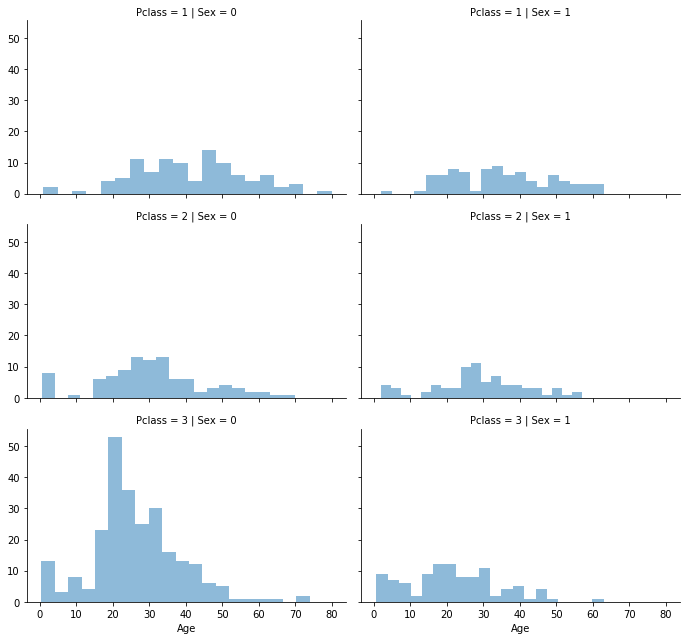

In [29]:
grid=sns.FacetGrid(titanic_train, row='Pclass', col='Sex', size=3.0, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()
plt.show()

In [30]:
# Imputing Age
guess_ages = np.zeros((2,3))       # 2 categories of Sex feature and 3 categories of Pclass feature
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [31]:
for dataset in combine:
    for i in range(0,2):# Age
        for j in range(0,3):#Pclass
            guess_df = dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            
            age_guess = guess_df.median()
            
            # converting random age float value to nearest 0.5 age
            guess_ages[i,j] = int(age_guess/0.5+0.5)*0.5
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex==i) & (dataset.Pclass==j+1), 'Age']=guess_ages[i,j]
            
    dataset['Age']=dataset['Age'].astype(int)

In [32]:
titanic_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
58,1,2,1,5,1,2,27.75,S,2
790,0,3,0,25,0,0,7.75,Q,1
481,0,2,0,30,0,0,0.00,S,1
657,0,3,1,32,1,1,15.50,Q,3
132,0,3,1,47,1,0,14.50,S,3


In [33]:
# Age bands and determine correlations with Survived
titanic_train['AgeBand']=pd.cut(titanic_train['Age'],5)
titanic_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [34]:
# replacing age with ordinals on these bands
for dataset in combine:
    dataset.loc[ dataset['Age']<=16, 'Age']=0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32), 'Age']=1
    dataset.loc[(dataset['Age']>32) & (dataset['Age']<=48), 'Age']=2
    dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64), 'Age']=3
    dataset.loc[ dataset['Age']>64, 'Age']

In [35]:
titanic_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
821,1,3,0,1,0,0,8.6625,S,1,"(16.0, 32.0]"
496,1,1,1,3,1,0,78.2667,C,2,"(48.0, 64.0]"
520,1,1,1,1,0,0,93.5000,S,2,"(16.0, 32.0]"
590,0,3,0,2,0,0,7.1250,S,1,"(32.0, 48.0]"
782,0,1,0,1,0,0,30.0000,S,1,"(16.0, 32.0]"


In [36]:
titanic_train[titanic_train.Age>3]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
33,0,2,0,66,0,0,10.5000,S,1,"(64.0, 80.0]"
54,0,1,0,65,0,1,61.9792,C,1,"(64.0, 80.0]"
96,0,1,0,71,0,0,34.6542,C,1,"(64.0, 80.0]"
116,0,3,0,70,0,0,7.7500,Q,1,"(64.0, 80.0]"
280,0,3,0,65,0,0,7.7500,Q,1,"(64.0, 80.0]"
456,0,1,0,65,0,0,26.5500,S,1,"(64.0, 80.0]"
493,0,1,0,71,0,0,49.5042,C,1,"(64.0, 80.0]"
630,1,1,0,80,0,0,30.0000,S,1,"(64.0, 80.0]"
672,0,2,0,70,0,0,10.5000,S,1,"(64.0, 80.0]"
745,0,1,0,70,1,1,71.0000,S,5,"(64.0, 80.0]"


In [37]:
titanic_train.drop(['AgeBand'], axis=1, inplace=True)
combine=[titanic_train, titanic_test]
titanic_train.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
421,0,3,0,1,0,0,7.7333,Q,1
509,1,3,0,1,0,0,56.4958,S,1
320,0,3,0,1,0,0,7.2500,S,1
19,1,3,1,1,0,0,7.2250,C,3
520,1,1,1,1,0,0,93.5000,S,2


In [38]:
for dataset in combine:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
    
titanic_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [39]:
for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1, 'IsAlone']=1
    
titanic_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [40]:
titanic_train.drop(['SibSp', 'Parch', 'FamilySize'], axis=1, inplace=True)
titanic_test.drop(['SibSp', 'Parch', 'FamilySize'], axis=1, inplace=True)

combine=[titanic_train, titanic_test]

titanic_train.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
580,1,2,1,1,30.0000,S,2,0
739,0,3,0,1,7.8958,S,1,1
883,0,2,0,1,10.5000,S,1,1
882,0,3,1,1,10.5167,S,2,1
315,1,3,1,1,7.8542,S,2,1


In [41]:
freq_port=titanic_train.Embarked.dropna().mode()[0]
freq_port

'S'

In [42]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].fillna(freq_port)
    
titanic_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [43]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
    
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,0
4,0,3,0,2,8.0500,0,1,1


In [44]:
for dataset in combine:
    dataset['Age*Class']=dataset['Age']*dataset['Pclass']
    
titanic_train.loc[:,['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [45]:
# imputing NA value in test datatset
titanic_test['Fare'].fillna(titanic_test['Fare'].dropna().median(), inplace=True)
titanic_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1.0,1,6
1,893,3,1,2,7.0000,0,3.0,0,6
2,894,2,0,3,9.6875,2,1.0,1,6
3,895,3,0,1,8.6625,0,1.0,1,3
4,896,3,1,1,12.2875,0,3.0,0,3


In [46]:
# Fareband
titanic_train['FareBand']=pd.qcut(titanic_train['Fare'],4)
titanic_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [47]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare']=0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454), 'Fare']=1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31.0), 'Fare']=2
    dataset.loc[dataset['Fare']>31.0, 'Fare']=3
    dataset['Fare']=dataset['Fare'].astype(int)
    
titanic_train.drop(['FareBand'], axis=1, inplace=True)

# combine=[titanic_train, titanic_test]

titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [48]:
titanic_train.Age.value_counts()

1     495
2     216
0     100
3      69
70      3
65      3
71      2
80      1
74      1
66      1
Name: Age, dtype: int64

In [49]:
titanic_test['Title'].astype(int)
titanic_test.sample(5)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
14,906,1,1,2,3,0,3.0,0,2
324,1216,1,1,2,3,0,2.0,1,2
259,1151,3,0,1,0,0,1.0,1,3
125,1017,3,1,1,2,0,2.0,0,3
360,1252,3,0,0,3,0,4.0,0,0


## Algos:

- Logistic Regression
- KNN or k-Nearest Neighbors
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Perceptron
- Artificial neural network
- RVM or Relevance Vector Machine

### Train test split

In [51]:
x_train = titanic_train.drop('Survived', axis=1)
y_train = titanic_train['Survived']

x_test  = titanic_test.drop('PassengerId', axis=1).copy()
x_train.shape, y_train.shape, x_test.shape

((891, 8), (891,), (418, 8))

### Logistic Regression

In [49]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train)*100,2)
acc_log

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


80.36

In [50]:
coeff_df = pd.DataFrame(titanic_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287164
4,Embarked,0.261762
6,IsAlone,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311199
0,Pclass,-0.749006


### Support Vector Machines

In [51]:
svc = SVC()
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

acc_svc = round(svc.score(x_train, y_train)*100,2)
acc_svc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.84

### K-nearest neighbor

In [52]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

acc_knn = round(knn.score(x_train, y_train)*100,2)
acc_knn

84.74

### Gaussian Naive Bayes

In [53]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

y_pred = gaussian.predict(x_test)

acc_gaussian = round(gaussian.score(x_train, y_train)*100,2)
acc_gaussian

72.28

### Perceptron

In [54]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)

y_pred = perceptron.predict(x_test)

acc_perceptron = round(perceptron.score(x_train, y_train)*100,2)
acc_perceptron

78.34

### Linear SVC

In [55]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train, y_train)*100,2)
acc_linear_svc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.01

### Stochastic Gradient Descent

In [56]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

y_pred = sgd.predict(x_test)

acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
acc_sgd

75.53

### Decision Tree

In [57]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)

acc_decision_tree = round(decision_tree.score(x_train, y_train)*100,2)
acc_decision_tree

86.76

### Random Forest

In [58]:
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)

acc_random_forest = round(random_forest.score(x_train, y_train)*100,2)
acc_random_forest

86.76

## Adding XGBoost also in the list of algorithms used - Date: 10/01/2020

In [52]:
dtrain = xgb.DMatrix(x_train, label = y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [53]:
# Parameters
param = {'max_depth':2, 'eta':1, 'objective': 'binary:logistic'}
param['nthread'] = 4
param['eval_metric'] = 'auc'

In [54]:
evallist = [(dtrain, 'eval'), (dtrain, 'train')]

In [55]:
num_round = 100
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=10)
# bst.fit()

[0]	eval-auc:0.843407	train-auc:0.843407
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 10 rounds.
[1]	eval-auc:0.861449	train-auc:0.861449
[2]	eval-auc:0.868477	train-auc:0.868477
[3]	eval-auc:0.873337	train-auc:0.873337
[4]	eval-auc:0.883115	train-auc:0.883115
[5]	eval-auc:0.881571	train-auc:0.881571
[6]	eval-auc:0.888822	train-auc:0.888822
[7]	eval-auc:0.890662	train-auc:0.890662
[8]	eval-auc:0.89169	train-auc:0.89169
[9]	eval-auc:0.892811	train-auc:0.892811
[10]	eval-auc:0.89466	train-auc:0.89466
[11]	eval-auc:0.893914	train-auc:0.893914
[12]	eval-auc:0.893674	train-auc:0.893674
[13]	eval-auc:0.895064	train-auc:0.895064
[14]	eval-auc:0.894596	train-auc:0.894596
[15]	eval-auc:0.896505	train-auc:0.896505
[16]	eval-auc:0.89691	train-auc:0.89691
[17]	eval-auc:0.900886	train-auc:0.900886
[18]	eval-auc:0.901498	train-auc:0.901498
[19]	eval-auc:0.902318	train-auc:0.902318
[20]	eval-auc:0.901914	train-auc:

In [56]:
bst.best_score
# bst.evals_result()

0.91248

In [59]:
dtest = xgb.DMatrix(x_test)
y_prob = bst.predict(dtest)

In [60]:
y_pred = np.where(y_prob>0.5,1,0)

### Model Evaluation

In [60]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
7,Linear SVC,79.01
5,Perceptron,78.34
6,Stochastic Gradient Decent,75.53
4,Naive Bayes,72.28


In [61]:
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": y_pred})

In [62]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [63]:
submission.to_csv('submission_file_4_10012019.csv', index=False)